In [38]:
import pandas as pd

In [58]:
trader_df=pd.read_csv("historical_data.csv")
fg_df=pd.read_csv("fear_greed_index.csv")

In [59]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [60]:
fg_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [61]:
fg_df=fg_df.rename(columns={'date':'Date'})

In [62]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['Date'] = trader_df['Timestamp IST'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])
fg_df['Date'] = pd.to_datetime(fg_df['Date'])


In [63]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [64]:
fg_df.head()

,timestamp,value,classification,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [65]:
merged_df = pd.merge(trader_df, fg_df, on='Date', how='inner')
merged_df['Sentiment'] = merged_df['classification'].apply(lambda x: 1 if x == 'Greed' else 0)
print(merged_df[['Date', 'classification', 'Account', 'Closed PnL']].head())

        Date classification                                     Account  \
0 2024-12-02  Extreme Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   
1 2024-12-02  Extreme Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   
2 2024-12-02  Extreme Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   
3 2024-12-02  Extreme Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   
4 2024-12-02  Extreme Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   

   Closed PnL  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Amar007thegrt\AppData\Local\Temp\ipykernel_19784\5065587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=avg_pnl_by_sentiment, palette='Set2')


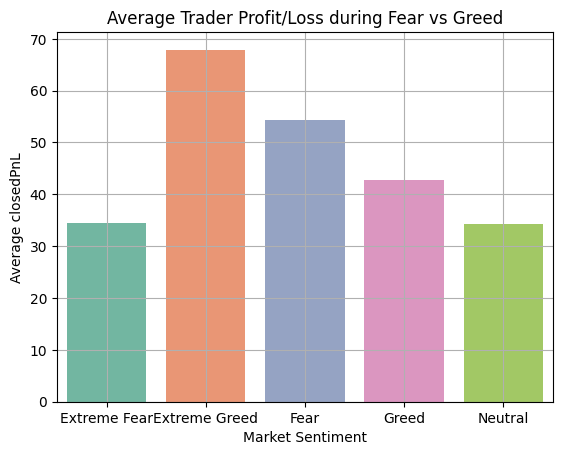

In [67]:

avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

sns.barplot(x='classification', y='Closed PnL', data=avg_pnl_by_sentiment, palette='Set2')
plt.title('Average Trader Profit/Loss during Fear vs Greed')
plt.ylabel('Average closedPnL')
plt.xlabel('Market Sentiment')
plt.grid(True)
plt.show()


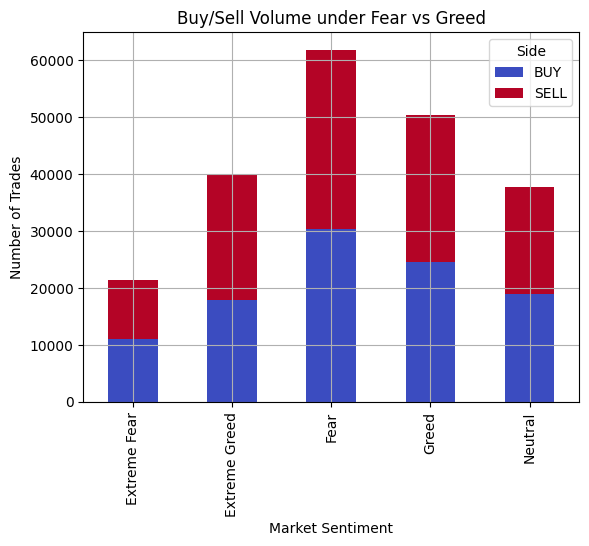

In [68]:

trade_counts = merged_df.groupby(['classification', 'Side']).size().unstack()

trade_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Buy/Sell Volume under Fear vs Greed')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.grid(True)
plt.show()
